In [132]:
import numpy as np
import pylab as pl
%matplotlib inline

In [133]:
# Defining the Target function
f = lambda x: x / ( 0.25 + x*x)

In [134]:
# Interval
xmin, xmax = -2.02857, 2.02857
n_points = 13
n = 12 # order of polynomial to fit
plot_points = 101

In [135]:
# 13 uniformly distributed points
points_uniform = np.linspace(xmin,xmax,n_points)
# Taking a much greater number of points to get a smooth function
points_function_plot = np.linspace(xmin, xmax, plot_points)

Plotting the target Function and 13 uniformly spaced points
----------------------------------------------------------

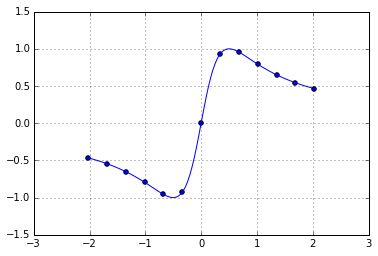

In [136]:
# Plot the 13 points we are interested in.
pl.scatter(points_uniform, f(points_uniform))
# Plot the curve.
pl.plot(points_function_plot, f(points_function_plot))
# Turn on grids
pl.grid()
pl.show()

Coefficients and Evaluate function
--------------------------------
These accept 'n' the degree of the polynomial that needs to be fit, as an argument. Hence they are can work for degree other than n=12 too.

In [137]:
def coefficients(n, x, y):
    # n is the degree of the desired polynomial
    #print "x",len(x),"y",len(y) 
    a = y
    for j in range(1,n+1):
        for i in range(n,j-1,-1):
            a[i] = (a[i] - a[i-1]) / (x[i] - x[i-j])
    #print "a", len(a)
    return a

In [138]:
def evaluate(n, x, a, t):
    pt = a[n]
    for i in range(n-1, -1, -1):
        pt = pt * (t - x[i]) + a[i];
    return pt
    

# Solution 3 (a) - Interpolating over uniformly spaced points

In [139]:
# Take linearly spaced X and get Y from the polynomial's analytical expression
x,y = points_uniform, f(points_uniform)

In [140]:
# Get Coefficients
coeff = coefficients(n, x, y)

In [141]:
evaluation = np.asarray([evaluate(n, x, coeff, t) for t in x], np.float)
#print evaluation

evaluation_100 = np.asarray([evaluate(n, x, coeff, t) for t in points_function_plot], np.float)
#print evaluation_100

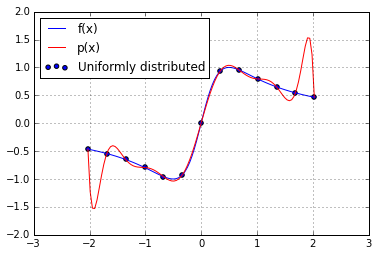

In [219]:
# Plot the 13 points we are interested in.
pl.scatter(points_uniform, f(points_uniform),label="Uniformly distributed")
# Plot the curve.
pl.plot(points_function_plot, f(points_function_plot),label="f(x)")
pl.plot(points_function_plot, evaluation_100, color='red',label="p(x)")
# Turn on grids
pl.grid()
pl.legend(loc="upper left")
#pl.figtext(-0.05,0,"Plot showing the actual and the interpolation by a degree 12 polynomial over uniformly distributed points")
pl.show()

Error and its Distribution
--------------------

In [213]:
# The mean absolute error
error = np.mean(np.abs(evaluation_100 - f(points_function_plot)))
print error

0.137122949967


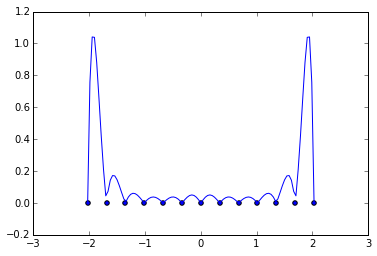

In [218]:
# 13 uniformly spaced points
pl.scatter(points_uniform, 0 * points_uniform)

#Error
error = np.abs(evaluation_100 - f(points_function_plot))
pl.plot(points_function_plot, error)
#pl.figtext(0,0,"The absolute error |f(x) - p(x)| in polynomial interpolation of x/(0.25 + x^2) using 13 equally spaced points.")

Analysis
--------

# Solution 3(b) - Interpolating over 13 Chebychev nodes

In [214]:
def get_chebychev(n,a,b):
    '''
    A closure which returns a function which would return
    chebychev nodes for n number of points in the interval [a,b]
    '''
    def chebychev(i):
        return 0.5*(a+b) + 0.5*(b-a)*np.cos((i*np.pi)/n)
    return chebychev

In [215]:
chebychev = get_chebychev(n_points-1,xmin, xmax) #Chebychev nodes for n_points=13
chebychev_nodes = np.asarray([chebychev(i) for i in range(n_points)], np.float) # range(n) => [0,n-1]

chebychev = get_chebychev(plot_points-1,xmin, xmax) #Chebychev nodes for plot_points=100 points
chebychev_nodes_100 = np.asarray([chebychev(i) for i in range(plot_points)], np.float) # range(n+1) => [0,n]

In [217]:
#Check to ensure the 7th Chebychev node is 0
for idx, node in enumerate(chebychev_nodes):
    print idx, node

0 2.02857
1 1.95944815344
2 1.75679315335
3 1.43441560311
4 1.014285
5 0.525032550324
6 1.24214087867e-16
7 -0.525032550324
8 -1.014285
9 -1.43441560311
10 -1.75679315335
11 -1.95944815344
12 -2.02857


In [157]:
y = f(chebychev_nodes)
x = chebychev_nodes
# Get coefficients for Chebychev Nodes
coeff = coefficients(n, x, y)

In [158]:
cheby_eval = np.asarray([evaluate(n, chebychev_nodes, coeff, t) for t in chebychev_nodes], np.float)
cheby_eval_100 = np.asarray([evaluate(n, chebychev_nodes, coeff, t) for t in chebychev_nodes_100], np.float)

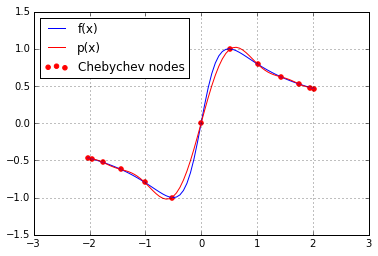

In [220]:
# Plot the 13 points we are interested in.
#pl.scatter(chebychev_nodes, f(chebychev_nodes))
pl.scatter(chebychev_nodes, cheby_eval, color='red', label="Chebychev nodes")#will print out the chebychev points

# Plot the curve.
pl.plot(chebychev_nodes_100, f(chebychev_nodes_100),label="f(x)")
pl.plot(chebychev_nodes_100, cheby_eval_100, color='red',label="p(x)")
# Turn on grids
pl.legend(loc="upper left")
#pl.figtext(-0.05,0,"Plot showing the actual and the interpolation by a degree 12 polynomial over Chebychev nodes.")
pl.grid()
pl.show()

In [153]:
error = np.mean(np.abs(cheby_eval_100 - f(chebychev_nodes_100)))
print error

0.0272302580903


Distribution of error
--------------------

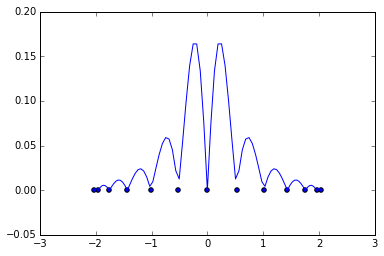

In [221]:
# 13 chebychev points
pl.scatter(chebychev_nodes, 0 * chebychev_nodes)

#Error
error = np.abs(cheby_eval_100 - f(chebychev_nodes_100))
pl.plot(chebychev_nodes_100, error)
#pl.figtext(0,0,"The absolute error |f(x) - p(x)| in polynomial interpolation of x/(0.25 + x^2) using 13 Chebychev nodes.")
pl.show()